# CS210 Term Project - Airbnb New York Price Prediction

*Ceren Anıl, Batur Gültekin, Kaya Kapağan, Habibe Koç, Yiğit Tekinalp*

**INTRODUCTION**

This project is aiming to predict a price range for a house/room given the specific attributes using machine learning algorithms. A price prediction would be very useful to both hosts and guests who are using this service, because it would help hosts to avoid overpricing/underpricing the place and the guests to avoid paying much more than deserved to a place.
The data used in this project is from between 2011-2018, it is explored and explained in detail in the Description of the Dataset (EDA) & Preprocessing part in detail.
After the through exploration of the data missing values got handled in appropriate manners which are explained in the related fields.
Also, in Preprocessing we created a new dataframe which has ranges for price instead of the exact price. We choose our range size as [x-20, x+20].
Lessening the complexity of the project and with that getting a faster response was important so, to see if dropping a specific attribute would or would not affect the overall accuracy of the project, a hypothesis testing was conducted. Attributes were chosen so the similarity of it to another attribute was significant. But results showed that no attributes should be dropped. 
As the last part of the project, we started to apply our chosen Machine Learning methods to our data. We used different dataframes for different methods and in total we used 2 different dataframes, one with normal price values and one with price ranges, and in total we used 5 different machine learning methods which are Random Forest Classifier, Linear Regression, Random Forest Regressor, MLP Classifier and Logistic Regression. We also used Grid Search and Cross Validation in Random Forest Regressor.
Results were at first was not really good when we tried to predict exact price using Random Forest Classifier, Linear Regression, Random Forest Regressor. So, we had to change something to make it better. We decided to make our problem more like a classification problem and we changed our prices to price ranges after applying Random Forest Classifier, MLP Classifier and Logistic Regression we obtained much better results and the best we had was Random Forest Classifier.

**PROBLEM DESCRIPTION**

Main problem of this project is that can we predict a price range for a rental Airbnb place given its features like the location and qualifications (all features are explained in detail in Description of the Dataset). Of course, to solve this problem we need to answer some sub-questions.
Most important of these questions is “What machine learning method we should use to get the best possible results?”. We are aiming to have the best accuracy.
Another important question is the feature selection. We have 15 features in the raw data except our target variable price. In data preprocessing we dropped some features for different reasons, those reasons are explained in detail in the place where they are dropped. In addition, we conducted some hypothesis testing in some features we thought could be dropped without a problem.
So, to sum it up our main question is “What is the price range of a given Airbnb rental depending on its features?”. And our hypothesis testing questions are “Is neighborhood group affecting the price of the rental?”, “Is longitude affecting the price of the rental?”, “Is latitude affecting the price of the rental?”


#Loading Modules and Data

**Importing** **frequently used libraries**

In [0]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt 
from google.colab import drive #for mounting the drive to load the data
import seaborn as sns
import random as rdn
from scipy import stats

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv("/content/drive/My Drive/CS210 Project/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#Description of the Dataset (EDA) & Preprocessing

Below part's output, we can see how our dataset shaped.

---



In [0]:
print("Number of columns (features) are:", df.shape[1])
print("Number of rows (samplings) are:", df.shape[0])

Number of columns (features) are: 16
Number of rows (samplings) are: 48895


In [0]:
print("Getting information about each columns non-null counts and their data types:\n")
print(df.info(), "\n\n")
print("Getting how many rows are null for each feature:\n\n", df.isna().sum())

Getting information about each columns non-null counts and their data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count 

We need to drop name and host_name features for ethical issues. So we do not need to worry about 16 and 21 null values respectively for name and host_name.

---

In [0]:
df.drop(['name'], axis = 1, inplace=True)
df.drop(['host_name'], axis = 1, inplace=True)

df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


We can convert last_review feature column, to datetime data type which is object type currently.

---



In [0]:
df["last_review"] = pd.to_datetime(df['last_review'])

df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


We can see that in the third row of our dataframe, we have 0 (zero) number_of_reviews, we do not have any value at last_review and reviews_per_month columns. So, we should check if for all values is it similar or we have any other condition. 

---



In [0]:
df1 = df[(df["number_of_reviews"] != 0) & (df["reviews_per_month"] == np.nan)]["reviews_per_month"]
df2 = df[(df["number_of_reviews"] != 0) & (df["last_review"] == np.nan)]["last_review"]

print(df1.shape)
print(df2.shape)

(0,)
(0,)


Because both of those dataframes are empty, we can conclude that we just have NaN values if our number_of_reviews feature's value is 0 so we can assign 0 to both last_review and reviews_per_month features as a way to handle missing values.

---



In [0]:
df["last_review"].fillna(0, inplace = True)
df["reviews_per_month"].fillna(0, inplace = True)

df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0


Let's see if we have any NaN values left.

---



In [0]:
df.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Target Feature Inspection and Relationships of Multiple Features**

Let's first look at the instances of Airbnb renatls in a map of New York as a heatmap.

---



In [0]:
import folium
from folium import plugins
from folium.plugins import HeatMap

def generateBaseMap(default_location=[ 40.730610, -73.935242], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

base_map = generateBaseMap()
df_copy = df
HeatMap(data=df_copy[['latitude', 'longitude', 'price']].groupby(['latitude', 'longitude']).mean().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

base_map

We are going to predict price so let's inspect the price feature in more detail.

---


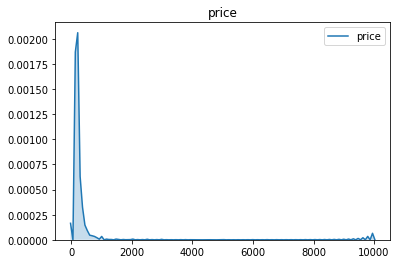

In [0]:
price_plt = sns.kdeplot(df['price'], shade=True)
title = price_plt.set_title("price")

As we see it is a really skewed distribution. To make it more closer to normal distributon we can use a logarithmic transformation. And the other option is removing the outliers but let's try with both, with outliers and without outliers.

---



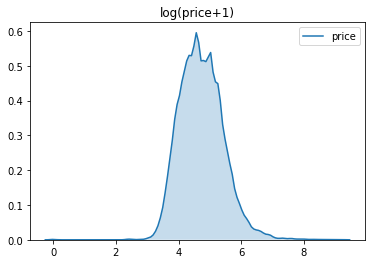

In [0]:
log_price_plt = sns.kdeplot(np.log1p(df['price']), shade=True)
title = log_price_plt.set_title("log(price+1)")

As we see at the upper cell it is more closer to normal distribution now. So we can make a logarithmic transformation to price. Then we can create 2 new data frames which are df_w_o (data frame with outliers) and df_wo_o (data frame without outliers).

---



In [0]:
df['price_norm'] = np.log1p(df['price'])

df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_norm
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365,5.010635
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355,5.420535
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,5.017280
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194,4.499810
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0,4.394449


In [0]:
df_w_o = df 
df_wo_o = df[(df['price_norm'] < 8) & (df['price_norm'] > 3)]

df_wo_o.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_norm
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365,5.010635
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355,5.420535
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,5.017280
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194,4.499810
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0,4.394449


Now let's see the price graphs for with and without outliers.

---



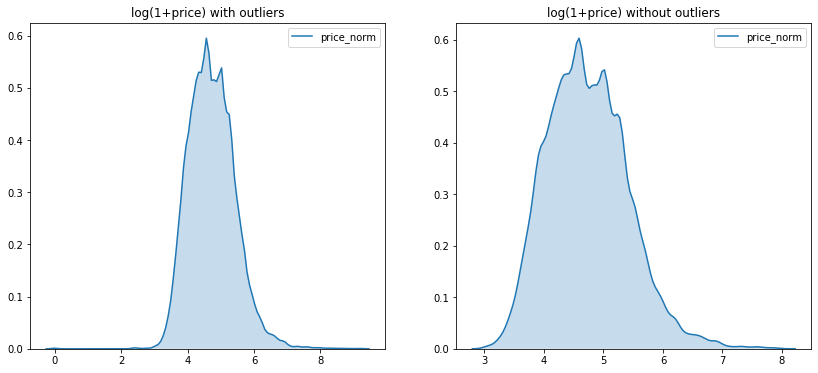

In [0]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
plt_w_o = sns.kdeplot(df_w_o['price_norm'], ax=axes[0], shade = True)
plt_wo_o = sns.kdeplot(df_wo_o['price_norm'], ax=axes[1], shade = True)
title1 = axes[0].set_title('log(1+price) with outliers')
title2 = axes[1].set_title('log(1+price) without outliers')

Now let's look at other features starting with host_id and id. Because we do not have any other data about host, and we have limited data it will cause bad estimation while using regression. If we could have much more samples and more data about host, host_id may give a good estimation about price (like according to host's sign up date etc.) but we don't have that kind of information. So, for this data we are going to drop id and host_id feature columns.

---



In [0]:
df.drop(["host_id"], axis = 1, inplace=True)
df.drop(["id"], axis = 1, inplace=True)

df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_norm
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365,5.010635
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355,5.420535
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,5.017280
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194,4.499810
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0,4.394449


In [0]:
print(df_wo_o.shape)
print(df_w_o.shape)

(48784, 15)
(48895, 13)


Mapping exact prices to price range values because we want to have our target variable as a categorical variable.

---



In [0]:
df_zip = df.assign(temp_price=lambda x: round(x.price, -1) // 10 - ((round(x.price, -1) // 10) % 4 ))
df_zip.drop("price", axis=1, inplace = True)
df_zip.drop("price_norm", axis=1, inplace = True)
df_zip

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,temp_price
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,2018-10-19 00:00:00,0.21,6,365,12
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2019-05-21 00:00:00,0.38,2,355,20
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0,0.00,1,365,12
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,2019-07-05 00:00:00,4.64,1,194,8
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,2018-11-19 00:00:00,0.10,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,2,0,0,0.00,2,9,4
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,4,0,0,0.00,2,36,4
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,10,0,0,0.00,1,27,12
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,1,0,0,0.00,6,2,4


**Feature Relationships**

Above plot shows the distribution of number of rental places in different neighbourhood groups of New York City which has a posting in Airbnb.

---



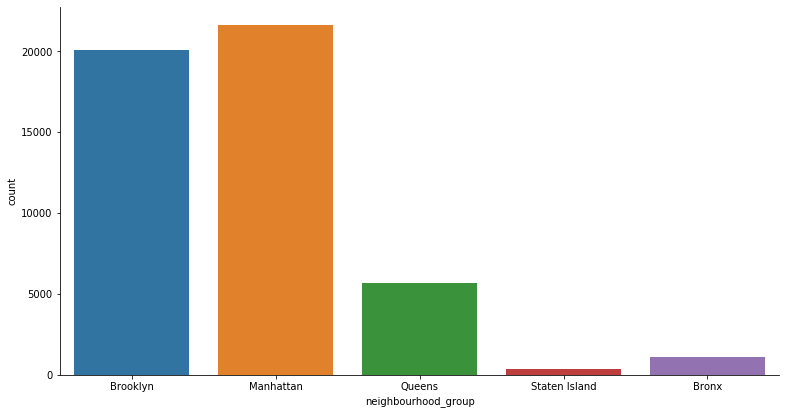

In [0]:
sns.catplot(x='neighbourhood_group', kind='count' ,data=df)
fig = plt.gcf()
fig.set_size_inches(12, 6)

Next plot shows the instances in terms of latitude and longitude and we can see it actually looks a little bit like New York City and a lot like the folium map above.

---



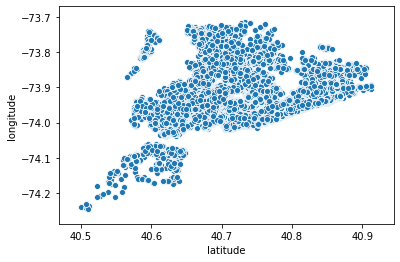

In [0]:
#fig, axes = plt.subplots(1,3, figsize=(21,6))
#sns.kdeplot(df['latitude'], ax=axes[0], shade = True)
#sns.kdeplot(df['longitude'], ax=axes[1], shade = True)
sns.scatterplot(x= df['latitude'], y=df['longitude'])

Below plot shows the distribution of number of rental places in terms of rental type. According the graph below, it is obvious that the dataset is balanced away form 'Shared room' properties. The distribution of the private room and entire home/apt rentals have the majority of the dataset, the entire home/apt rentals come to the fore with a 10 percent difference between private rooms.

---



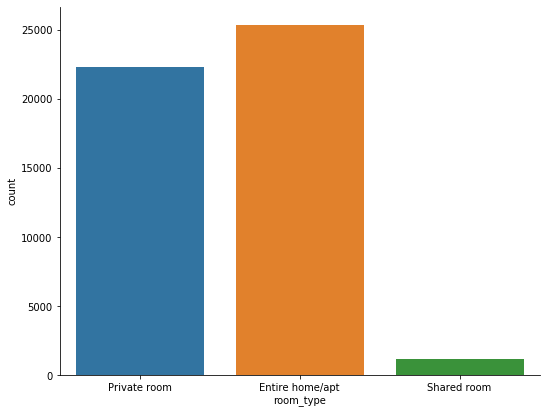

In [0]:
dfcopyB=df.copy()
sns.catplot(x='room_type', kind='count',data=dfcopyB)
fig = plt.gcf()
fig.set_size_inches(8, 6)

The graphs below shows the distubiton of rentals' limitation for the minimum stays in terms of number of nights that have to be spend. The graphs indicates that number of rentals and minimum stay are inversely proportional.

---



Text(0, 0.5, 'count')

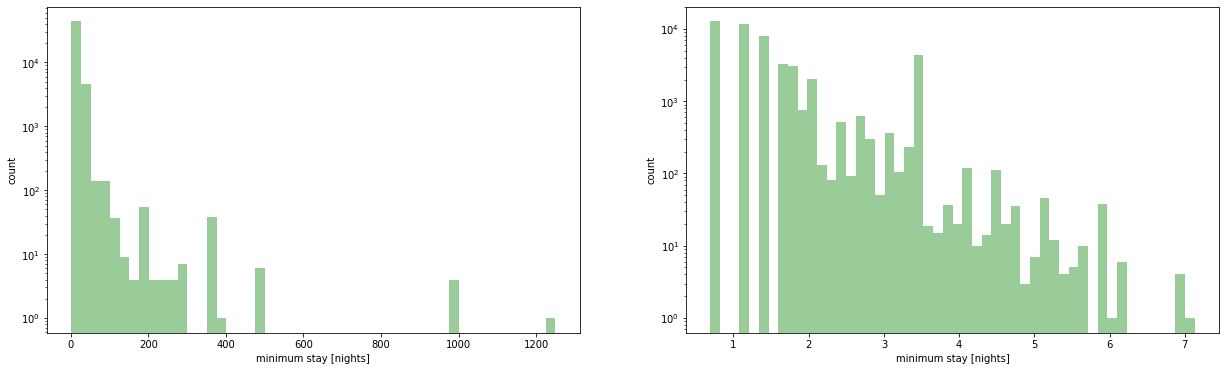

In [0]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))

sns.distplot(dfcopyB['minimum_nights'], rug=False, kde=False, color="green", ax = axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('minimum stay [nights]')
axes[0].set_ylabel('count')

sns.distplot(np.log1p(dfcopyB['minimum_nights']), rug=False, kde=False, color="green", ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_xlabel('minimum stay [nights]')
axes[1].set_ylabel('count')

In [0]:
dfcopyB['minimum_nights'] = np.log1p(dfcopyB['minimum_nights'])

The plots below indicates the distrubiton of reviews per month. The graphs are highly skewed to the right, because the majority of the rentals get a few number of reviews. The assumed explanation of this situation would be that the rentals that are available for the larger portion of the year get more reviews in contrast to the ones which are available for a small portion of the year. 

---



Text(0.5, 0, 'ln(reviews_per_month)')

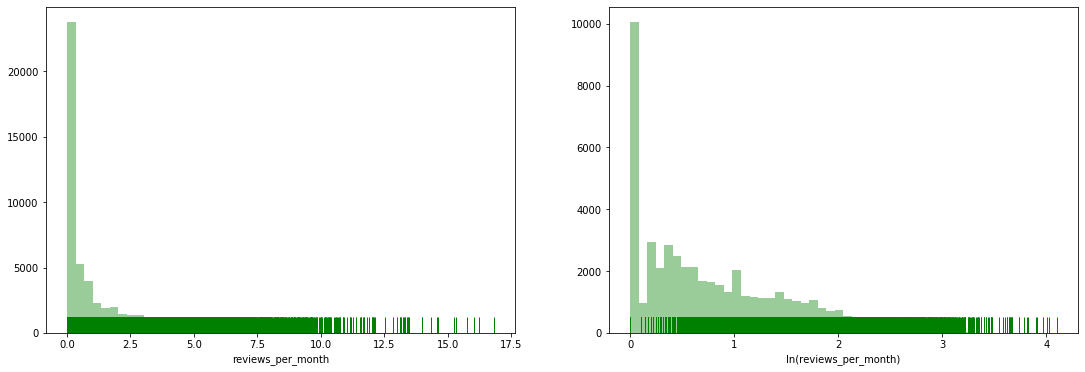

In [0]:
fig, axes = plt.subplots(1,2,figsize=(18.5, 6))
sns.distplot(dfcopyB[dfcopyB['reviews_per_month'] < 17.5]['reviews_per_month'], rug=True, kde=False, color="green", ax=axes[0])
sns.distplot(np.sqrt(dfcopyB[dfcopyB['reviews_per_month'] < 17.5]['reviews_per_month']), rug=True, kde=False, color="green", ax=axes[1])
axes[1].set_xlabel('ln(reviews_per_month)')

In contradiction to the assumption, the scatter plot below, which indicates the plot of reviews per month and availability of rentals in a year, shows that there are no corolation between reviews per month and availability of rentals in a year.

---



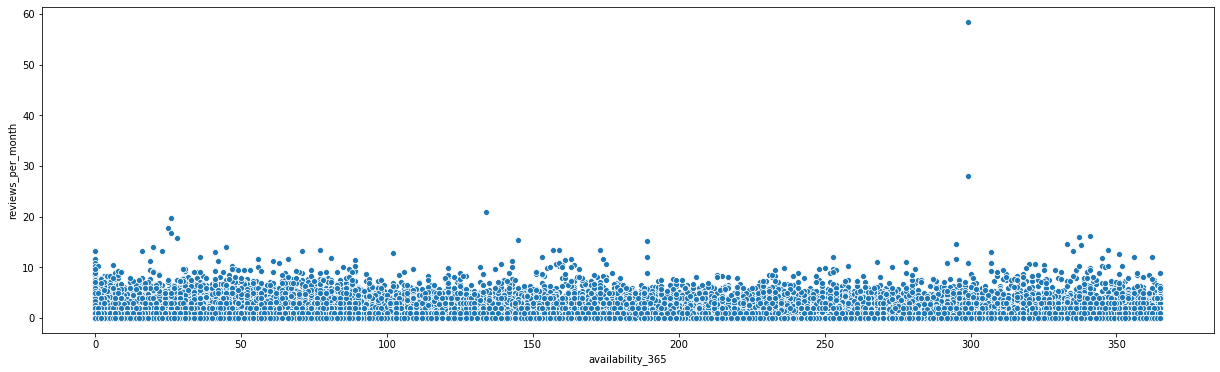

In [0]:
fig, axes = plt.subplots(1,1, figsize=(21,6))
sns.scatterplot(x= dfcopyB['availability_365'], y=dfcopyB['reviews_per_month'])

In [0]:
dfcopyB['reviews_per_month'] = dfcopyB[dfcopyB['reviews_per_month'] < 17.5]['reviews_per_month']

 The graph below shows the distubiton of rentals' availability for the entire year. The plot is skewed to the both ends but its mostly left skewed which indicates the most of the rentals are available just a small proportion(a couple of days) of the year. Even though, there are a decent number of rentals which are avilable for the vast majority of the year (more than 300 days). 

---



(0, 365)

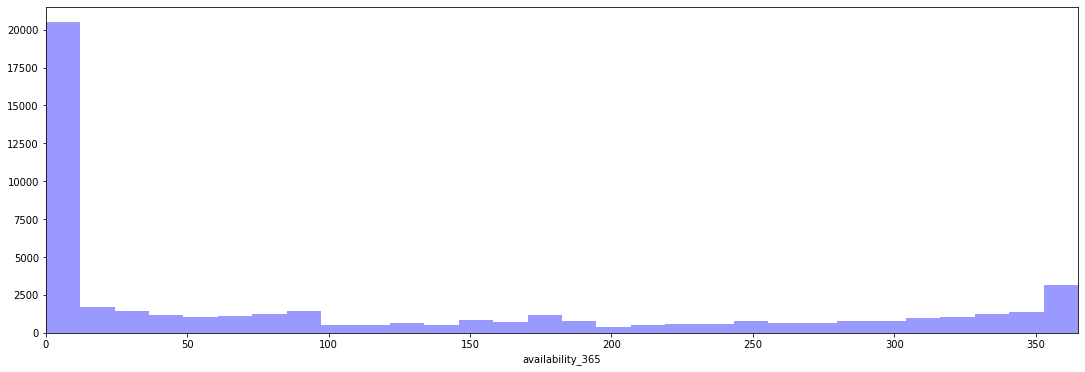

In [0]:
fig, axes = plt.subplots(1,1,figsize=(18.5, 6))
sns.distplot(dfcopyB['availability_365'], rug=False, kde=False, color="blue", ax=axes)
axes.set_xlabel('availability_365')
axes.set_xlim(0, 365)

As a feature enginnering;

---



In [0]:
dfcopyB['all_year_avail'] = dfcopyB['availability_365']>353
dfcopyB['low_avail'] = dfcopyB['availability_365']< 12
dfcopyB['no_reviews'] = dfcopyB['reviews_per_month']==0

**Correlation Matrix** 

We need to see the relationship of all features with each other. One easy way to do it is creating a correlation matrix which shows the correlation level of 2 features.

---



Text(0.5, 1, 'Correlation Matrix')

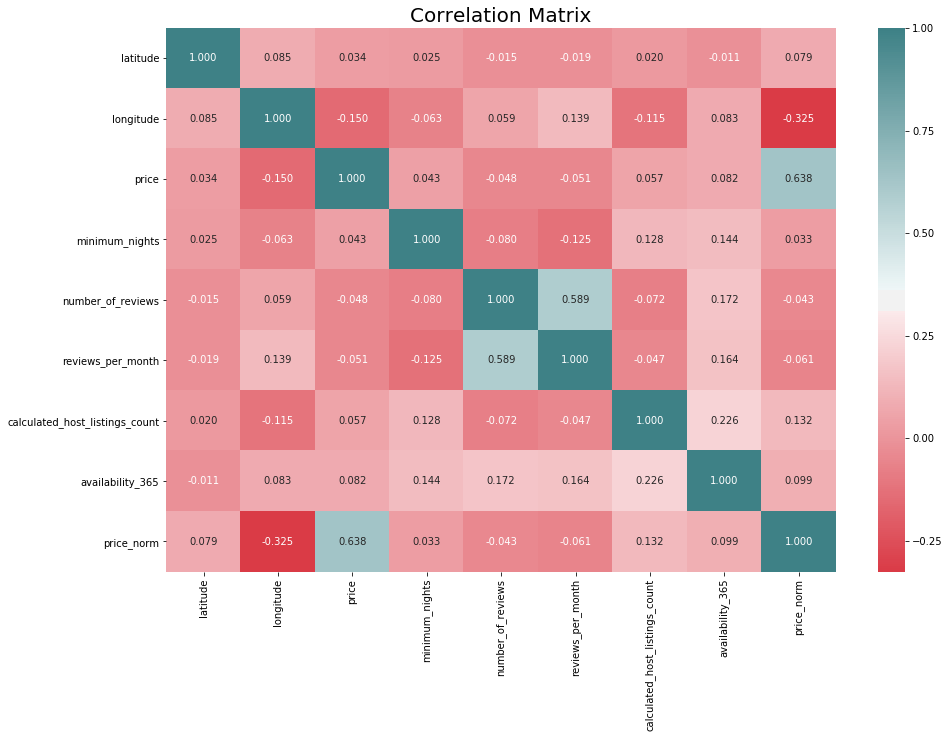

In [0]:
plt.figure(figsize=(15, 10))
palette = sns.diverging_palette(10, 200, n=256)
corr = df.corr(method ='pearson')
sns.heatmap(corr, annot=True,fmt=".3f", cmap=palette)
plt.title("Correlation Matrix",size =20)

We use correlation matrix to see if there are any strong relationship between price and other features. But we can clearly see that there are no strong relationship between price and others. There are 2 negative correlation between price-longtitude and price-reviews_per_month. This shows that as the reviews per month increases the price will decrease and vice-versa. Price also has a somewhat strong relationship with the price_norm but it is because price_norm is a feature extracted from the price.

---



Let's see the histograms of our features.

---



['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price_norm']


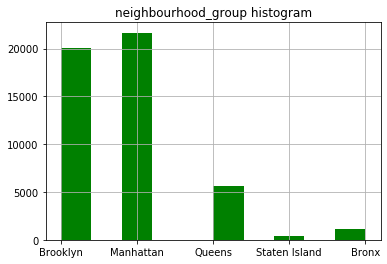

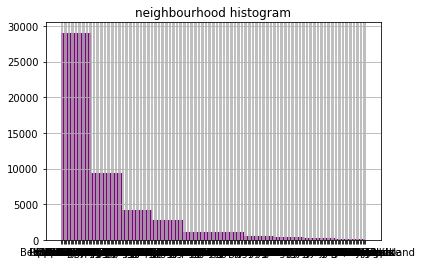

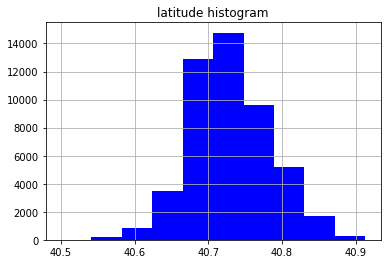

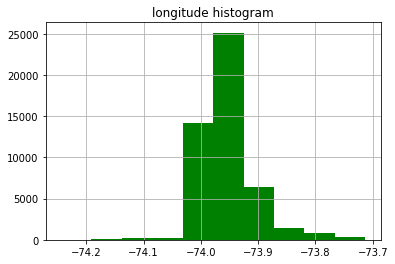

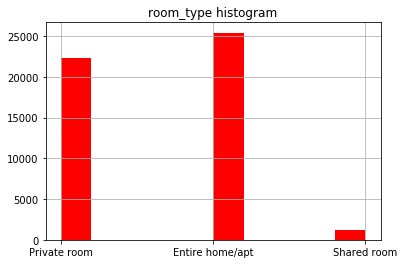

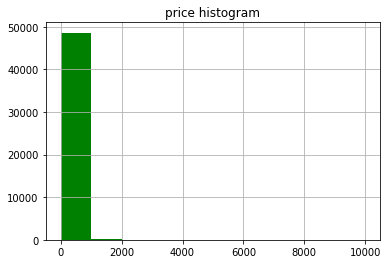

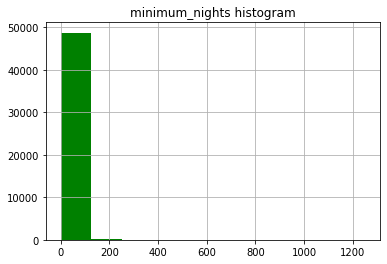

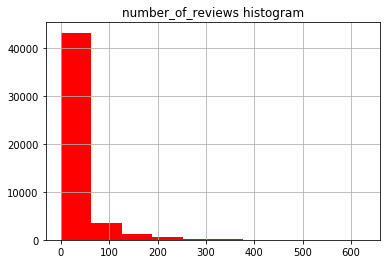

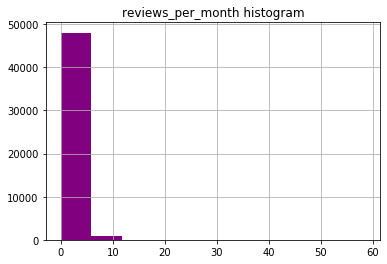

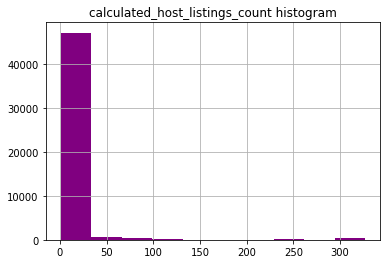

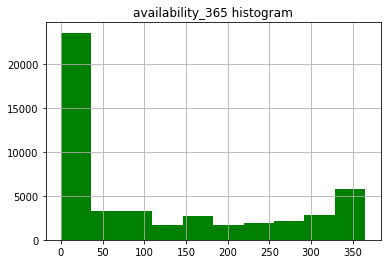

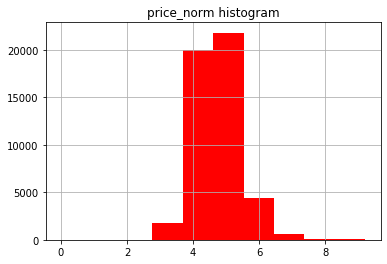

In [0]:
cols = df.columns.tolist()
print(cols)
  
colors = ["red", "blue","green", "purple"]
for column in cols:
  if(column != 'last_review'): #beacuse this is a date-time object, program cannot handle the conversion of it
    plot = df[column].hist(color = colors[rdn.randint(0,len(colors)-1)])
    plt.title(column+ " histogram")
    fig = plot.get_figure() 
    plt.show()

**Summary**

---



In [0]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_norm
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,4.736885
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,0.695344
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,4.248495
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,4.672829
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,5.170484
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,9.210440


# Hypothesis Testing

**HYPOTHESIS 1**

***Null*** ***Hypothesis***


> Neighborhood group has no effect on the prices of Airbnb's in New York City

---





**Testing**

Our data in feature neighbourhood group consist of 5 different regions, in order to compare them we will use ANOVA statistical technique to check their relation with price. Then we will take the price value between 0-2000 to compare more equal sized groups.

---



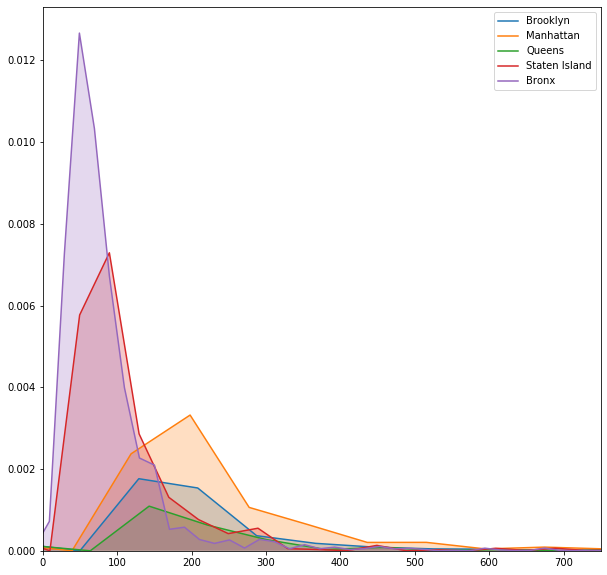

In [0]:
test1_df = df[df["neighbourhood_group"] == "Brooklyn"]["price"]
test2_df = df[df["neighbourhood_group"] == "Manhattan"]["price"]
test3_df = df[df["neighbourhood_group"] == "Queens"]["price"]
test4_df = df[df["neighbourhood_group"] == "Staten Island"]["price"]
test5_df = df[df["neighbourhood_group"] == "Bronx"]["price"]

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_xlim(0,750)

sns.kdeplot(test1_df, shade=True, ax=ax, label="Brooklyn")
sns.kdeplot(test2_df, shade=True, ax=ax, label="Manhattan")
sns.kdeplot(test3_df, shade=True, ax=ax, label="Queens")
sns.kdeplot(test4_df, shade=True, ax=ax, label="Staten Island")
sns.kdeplot(test5_df, shade=True, ax=ax, label="Bronx")

plt.savefig("/content/drive/My Drive/CS210 Project/" + "Hypothesis" + ".png" )
plt.show()

In [0]:
signifance=0.05
test1_df = test1_df.between(0,2000)
test2_df = test2_df.between(0,2000)
test3_df = test3_df.between(0,2000)
test4_df = test4_df.between(0,2000)
test5_df = test5_df.between(0,2000)

_, p_value = stats.f_oneway(test1_df, test2_df, test3_df,test4_df,test5_df)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)

if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, neighbourhood group affects prices.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, neighbourhood group does not affects prices.")

P value:  1.19E-05
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, neighbourhood group affects prices.


**HYPOTHESIS** **2**

**Null Hypothesis**

> Latitude has no effect on the prices of Airbnb's in New York City

---



**Testing**

We will analyze the feature latitude by dividing it into two subgroups which are Upstate and Downstate New York. We will use T-test to determine their relationship with price. We will take the price between 0-2000 to compare more equal sized groups.

---



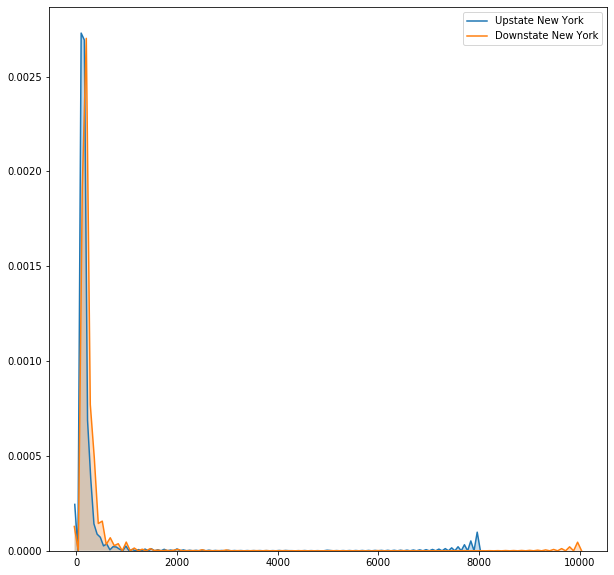

In [0]:
test_df = df[df["latitude"] <= 40.70000]	
rest_df = df[df["latitude"] > 40.70000]	

fig, ax = plt.subplots(1,1, figsize=(10,10))

ax = sns.kdeplot(test_df["price"].rename("Upstate New York"), shade=True)
sns.kdeplot(rest_df["price"].rename("Downstate New York"),  ax=ax, shade=True)

plt.savefig("/content/drive/My Drive/CS210 Project/" + "Hypothesis2" + ".png" )

plt.show()

In [0]:
signifance=0.05
test_values = test_df["price"].between(0,2000)
rest_values = rest_df["price"].between(0,2000)

_, p_value = stats.ttest_ind(a=test_values, b=rest_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)

if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, latitute affects price.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, latitude does not affect price.")

P value:  7.76E-03
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, latitute affects price.


**HYPOTHESIS 3**

**Null Hypothesis**

> Longitude has no effect on the prices of Airbnb's in New York City

---



**Testing**

We will analyze the feature longitude by dividing it into two subgroups which are East and West New York. We will use T-test to determine their relationship with price. We will take the price between 0-2000 to compare more equal sized groups.

---



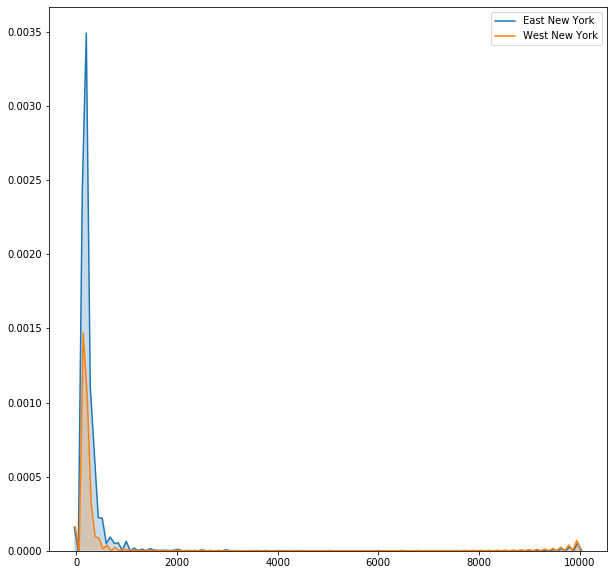

In [0]:
test_df = df[df["longitude"] <= -73.96000]	
rest_df = df[df["longitude"] > -73.96000]	

fig, ax = plt.subplots(1,1, figsize=(10,10))

ax = sns.kdeplot(test_df["price"].rename("East New York"), shade=True)
sns.kdeplot(rest_df["price"].rename("West New York"),  ax=ax, shade=True)

plt.savefig("/content/drive/My Drive/CS210 Project/" + "Hypothesis3" + ".png" )

plt.show()

In [0]:
signifance=0.05
test_values = test_df["price"].between(0,2000)
rest_values = rest_df["price"].between(0,2000)

_, p_value = stats.ttest_ind(a=test_values, b=rest_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)

if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, longitute affects price.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, longitude does not affect price.")

P value:  5.83E-09
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, longitute affects price.


#Machine Learning
---

**METHODS**

Detailed dataset explanation and the hypothesis testing conductions and results can be found in the above 2 sections.
As mentioned in the introduction we used different dataframes for different methods. We used the normal dataframe containing the normal price in Linear Regression and Random Forest Regression methods because they are designed to make regressions and predict an exact numerical value. On the other hand, we used a dataframe with the price ranges-which can be seen as categorical- in Random Forest, MLP Classifier (Neural Network), and Logistic Regression methods because they are used in classification problems because our ranges are now categories.
Let’s look at our machine learning methods a little bit closer (they are also explained a little in their respective places in the Machine Learning section). At first step when we only had the normal dataframe with normal prices we used Random Forest Classifier to show that the problem we had was not a classification problem but a regression problem, we had 0.07 accuracy and it was enough to show that. After that, we created Linear Regression and Random Forest Regressor models because they both are designed for regression. The results we got from those 3 models are:

| **ML Methods**  | **Extra Algorithms?** | **R-square** | **Accuracies** | **MSE** |
| ---             |   ---                 |  ---         | ---        | --- |
| `Random Forest Classifier` | n_estimators=10 | -0.27211463850698037 | 0.07 | 56276.11 |
| `Multiple Linear Regression` | No | 0.110 | - | 39353.42 |
| `Random Forest Regressor` | Grid Search, Cross-Val | 0.109 | - | 38877.81 |

This was not good enough results for us, so we changed our project and created a new dataframe with categorized price. After that we added 2 new ML methods known for their success in classification methods and we considered methods that are significantly different than each other. So, we added MLP Classifier which is a basic neural network model and Logistic Regression. In addition, we started to use this new dataframe for the Random Forest Classifier, too. After that, we got drastically different results. You can see them below:

| **ML Methods**  | **Extra Algorithms?** | **R-square** | **Accuracies** | **MSE** |
| ---             |   ---                 |  ---         | --- | --- |
| `Random Forest Classifier` | Grid Search, Cross-Val, n_estimators=100 | 0.176 | 0.454 | 366.25 |
| `MLP Classifier` | No | 0.019 | 0.363 | 489.03 |
| `Logistic Regression` | Grid Search, Cross-Val | 0.013 | 0.381 | 437.61 |

We also made some hyperparameter tuning using Grid Search and Cross Validation in both Random Forest models.

We used always random_state = 42 to get the same results using the same random seed.

---




**Data Preparation**

Since most methods do not support categorical data, we tranformed columns that are categorical, into numerical data with LabelEncoder library.

---



In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
  if col == 'neighbourhood' or col == 'neighbourhood_group' or col == 'room_type':
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [0]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_norm
0,1,108,40.64749,-73.97237,1,149,1,9,2018-10-19 00:00:00,0.21,6,365,5.010635
1,2,127,40.75362,-73.98377,0,225,1,45,2019-05-21 00:00:00,0.38,2,355,5.420535
2,2,94,40.80902,-73.94190,1,150,3,0,0,0.00,1,365,5.017280
3,1,41,40.68514,-73.95976,0,89,1,270,2019-07-05 00:00:00,4.64,1,194,4.499810
4,2,61,40.79851,-73.94399,0,80,10,9,2018-11-19 00:00:00,0.10,1,0,4.394449


In this method, we cannot use the 'last review' datetime object column. Since, we are going to predict price, we shouldn't include 'price' and 'price_norm' columns to our model. So, we are going to drop these columns.

---



In [0]:
X = df.drop('last_review', axis=1)

In [0]:
X = X.drop('price_norm', axis=1)

In [0]:
X = X.drop('price', axis=1)

In [0]:
y = df['price']

In [0]:
X.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,1,9,0.21,6,365
1,2,127,40.75362,-73.98377,0,1,45,0.38,2,355
2,2,94,40.80902,-73.94190,1,3,0,0.00,1,365
3,1,41,40.68514,-73.95976,0,1,270,4.64,1,194
4,2,61,40.79851,-73.94399,0,10,9,0.10,1,0


**New Dataframe with Price Ranges**

We will now follow the earlier steps for our new dataframe df_zip to obtain X_zip and y_zip.

---



In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_zip.columns:
  if col == 'neighbourhood' or col == 'neighbourhood_group' or col == 'room_type':
    le.fit(df_zip[col])
    df_zip[col] = le.transform(df_zip[col])

In [0]:
df_zip.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,temp_price
0,1,108,40.64749,-73.97237,1,1,9,2018-10-19 00:00:00,0.21,6,365,12
1,2,127,40.75362,-73.98377,0,1,45,2019-05-21 00:00:00,0.38,2,355,20
2,2,94,40.80902,-73.94190,1,3,0,0,0.00,1,365,12
3,1,41,40.68514,-73.95976,0,1,270,2019-07-05 00:00:00,4.64,1,194,8
4,2,61,40.79851,-73.94399,0,10,9,2018-11-19 00:00:00,0.10,1,0,8


In [0]:
X_zip = df_zip.drop('last_review', axis=1)

In [0]:
X_zip = X_zip.drop('temp_price', axis=1)

In [0]:
y_zip = df_zip['temp_price']

In [0]:
X_zip.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,1,9,0.21,6,365
1,2,127,40.75362,-73.98377,0,1,45,0.38,2,355
2,2,94,40.80902,-73.94190,1,3,0,0.00,1,365
3,1,41,40.68514,-73.95976,0,1,270,4.64,1,194
4,2,61,40.79851,-73.94399,0,10,9,0.10,1,0


**RANDOM FOREST CLASSIFIER**


---



First, we use Random Forest to predict the price for a house/room.

We splitted our dataset into two parts such as train set and test set.

---



In [0]:
from sklearn.model_selection import train_test_split

X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X_zip, y_zip, test_size=0.20, random_state=42)

After splitting our dataset, we train the model on the training set to perform predictions on the test set.

---



In [0]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators = 100, max_depth=8, random_state=42)
model_rfc.fit(X_train_rfc, y_train_rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Before testing the unlearned data let's check the scores of the training data predicting.

---



In [0]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn import metrics

rfc_pred_tr = model_rfc.predict(X_train_rfc)

print('Mean Absolute Error of Random Forest Classifier for training:', metrics.mean_absolute_error(y_train_rfc, rfc_pred_tr))
print('Mean Squared Error of Random Forest Classifier for training:', metrics.mean_squared_error(y_train_rfc, rfc_pred_tr))
print('Root Mean Squared Error of Random Forest Classifier for training:', np.sqrt(metrics.mean_squared_error(y_train_rfc, rfc_pred_tr)))
print('R-square score of Random Forest Classifier for training: ', metrics.r2_score(y_train_rfc, rfc_pred_tr))
print("Accuracy of Random Forest Classifier for training: ", accuracy_score(y_train_rfc, rfc_pred_tr))

Mean Absolute Error of Random Forest Classifier for training: 6.2404131301769095
Mean Squared Error of Random Forest Classifier for training: 592.0053175171286
Root Mean Squared Error of Random Forest Classifier for training: 24.331159395251362
R-square score of Random Forest Classifier for training:  0.03312370335743342
Accuracy of Random Forest Classifier for training:  0.46622865323652724


After training our dataset, we check the Accuracy and R-square Score of Random Forest using actual and predicted values.

---



In [0]:
from sklearn.metrics import accuracy_score, r2_score

rfc_pred = model_rfc.predict(X_test_rfc)

In [0]:
print('Mean Absolute Error of Random Forest Classifier:', metrics.mean_absolute_error(y_test_rfc, rfc_pred))
print('Mean Squared Error of Random Forest Classifier:', metrics.mean_squared_error(y_test_rfc, rfc_pred))
print('Root Mean Squared Error of Random Forest Classifier:', np.sqrt(metrics.mean_squared_error(y_test_rfc, rfc_pred)))
print('R-square score of Random Forest Classifier: ', metrics.r2_score(y_test_rfc, rfc_pred))
print("Accuracy of Random Forest Classifier: ", accuracy_score(y_test_rfc, rfc_pred))

Mean Absolute Error of Random Forest Classifier: 5.864812353001329
Mean Squared Error of Random Forest Classifier: 419.46538500869207
Root Mean Squared Error of Random Forest Classifier: 20.480854108378686
R-square score of Random Forest Classifier:  0.05476547953721911
Accuracy of Random Forest Classifier:  0.45587483382758975


Let's see how accurate our predictions are...

---



In [0]:
df_rfc = pd.DataFrame({'Actual': y_test_rfc, 'Predicted': rfc_pred})
df_rfc1 = df_rfc.head(10)
df_rfc1

,Actual,Predicted
879,8,8
44383,0,4
15394,12,8
43230,44,24
16332,20,12
5966,16,12
29838,8,4
41764,4,8
11118,12,16
31800,4,8


Let's visualize our actual prices and predictions...

---



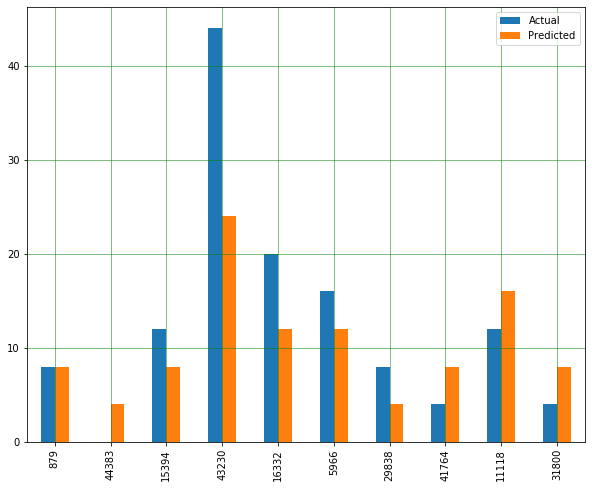

In [0]:
df_rfc1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**Hyperparameter Tuning**

We should try to find the best parameters to use in our model to get bet results. We will use Grid Search and Cross Validation. 

---



In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.preprocessing import MinMaxScaler

def rfc_model(X, y):
    #Perform Grid-Search
    gsc = GridSearchCV(estimator=RandomForestClassifier(),
                        param_grid={'max_depth': range(3,15),
                                    'n_estimators': (10, 50, 100)},
                        cv=5, verbose=0,n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfc = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=42, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_score(rfc, X, y, cv=10)

    return scores, rfc

Below there is every score we got in the tuning as an array.

---



In [0]:
scores_rfc, rfc = rfc_model(X_train_rfc, y_train_rfc)
print("Scores of Random Forest Classifier after Hyperparameter Tuning: ", scores_rfc)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Scores of Random Forest Classifier after Hyperparameter Tuning:  [0.44679778 0.45796292 0.46226415 0.45528871 0.46531866 0.47295565
 0.45610883 0.45414847 0.44975585 0.464901  ]


Let's check the scores for training data predicting.

---



In [0]:
from sklearn import metrics

rfc_pred_tr2 = cross_val_predict(rfc, X_train_rfc, y_train_rfc, cv=10)

print('Mean Absolute Error of Random Forest Classifier for training:', metrics.mean_absolute_error(y_train_rfc, rfc_pred_tr2))
print('Mean Squared Error of Random Forest Classifier for training:', metrics.mean_squared_error(y_train_rfc, rfc_pred_tr2))
print('Root Mean Squared Error of Random Forest Classifier for training:', np.sqrt(metrics.mean_squared_error(y_train_rfc, rfc_pred_tr2)))
print('R-square score of Random Forest Classifier for training: ', metrics.r2_score(y_train_rfc, rfc_pred_tr2))
print("Accuracy of Random Forest Classifier for training: ", accuracy_score(y_train_rfc, rfc_pred_tr2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Mean Absolute Error of Random Forest Classifier for training: 5.98916044585336
Mean Squared Error of Random Forest Classifier for training: 572.7530422333572
Root Mean Squared Error of Random Forest Classifier for training: 23.93225944689212
R-square score of Random Forest Classifier for training:  0.06456694901337712
Accuracy of Random Forest Classifier for training:  0.4585335923918601


Now, let's get the predictions using the best model depending on our rfc_model function and cross validation scoring.

---



In [0]:
rfc_pred2 = cross_val_predict(rfc, X_test_rfc, y_test_rfc, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Below is our final scores after the tuning.

---



In [0]:
from sklearn import metrics
print('Mean Absolute Error of Random Forest Classifier:', metrics.mean_absolute_error(y_test_rfc, rfc_pred2))
print('Mean Squared Error of Random Forest Classifier:', metrics.mean_squared_error(y_test_rfc, rfc_pred2))
print('Root Mean Squared Error of Random Forest Classifier:', np.sqrt(metrics.mean_squared_error(y_test_rfc, rfc_pred2)))
print('R-square score of Random Forest Classifier: ', metrics.r2_score(y_test_rfc, rfc_pred2))
print("Accuracy of Random Forest Classifier: ", accuracy_score(y_test_rfc, rfc_pred2))

Mean Absolute Error of Random Forest Classifier: 5.622660803763166
Mean Squared Error of Random Forest Classifier: 398.0578791287453
Root Mean Squared Error of Random Forest Classifier: 19.951387899811515
R-square score of Random Forest Classifier:  0.10300572599835778
Accuracy of Random Forest Classifier:  0.44431946006749157


**LINEAR** **REGRESSION**

---



In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

First, let's apply some simple linear regression to some attributes.

**Price vs. Longitude**

First two attributes we will use linear regression are price and longitude.

To get a more accurate result, let's perform a normalization on the attributes we are using.

---



In [0]:
l1 = df['longitude'].values.reshape(-1,1)
y1 = y.values.reshape(-1,1)

We splitted the data like we did with all other models --> 80% Training, 20% test.

---



In [0]:
l1_train, l1_test, y1_train, y1_test = train_test_split(l1, y1, random_state=42, test_size=0.20)

In [0]:
regr1 = linear_model.LinearRegression()

regr1.fit(l1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y1_pred = regr1.predict(l1_test)
y1_pred

array([[174.12200328],
       [118.12989911],
       [184.03543813],
       ...,
       [ 58.70529812],
       [175.51420479],
       [175.34618047]])

To see it more clearly and get a plot we should create a distinct dataframe.

---



In [0]:
df1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pred.flatten()})
df1

,Actual,Predicted
0,89,174.122003
1,30,118.129899
2,120,184.035438
3,470,200.309794
4,199,138.196804
...,...,...
9774,215,184.939569
9775,100,178.146586
9776,70,58.705298
9777,500,175.514205


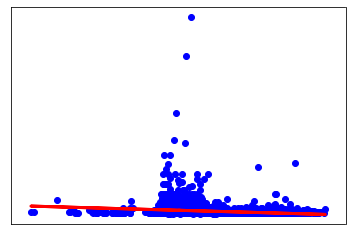

In [0]:
# Plot outputs
plt.scatter(l1_test, y1_test,  color='blue')
plt.plot(l1_test, y1_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [0]:
print('Coefficients: \n', regr1.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y1_pred))

Coefficients: 
 [[-800.11580699]]
Mean squared error: 43203.12
Coefficient of determination: 0.02


As seen above, r-square score is very low, it might be because this two attributes don't have a linear relationship.

**Price vs. Latitude**

Second two attributes we will use linear regression are price and latitude.

To get a more accurate result, let's perform a normalization on the attributes we are using.

---



In [0]:
l2 = df['latitude'].values.reshape(-1,1)

We splitted the data like we did with all other models --> 80% Training, 20% test.

---



In [0]:
l2_train, l2_test, y2_train, y2_test = train_test_split(l2, y1, random_state=42, test_size=0.20)

In [0]:
regr2 = linear_model.LinearRegression()

regr2.fit(l2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y2_pred = regr2.predict(l2_test)
y2_pred

array([[140.21302484],
       [150.22102747],
       [158.8622845 ],
       ...,
       [158.54200305],
       [152.61996727],
       [153.88682312]])

To see it more clearly and get a plot we should create a distinct dataframe.

---



In [0]:
df2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_pred.flatten()})
df2

,Actual,Predicted
0,89,140.213025
1,30,150.221027
2,120,158.862285
3,470,150.374826
4,199,164.478309
...,...,...
9774,215,153.197108
9775,100,159.236475
9776,70,158.542003
9777,500,152.619967


Coefficients: 
 [[158.55517484]]
Mean squared error: 44233.21
Coefficient of determination: 0.00


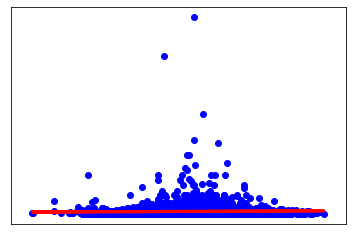

In [0]:
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y2_test, y2_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y2_test, y2_pred))

# Plot outputs
plt.scatter(l2_test, y2_test,  color='blue')
plt.plot(l2_test, y2_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

As seen above, r-square score is very low, it might be because this two attributes don't have a linear relationship.

---



**Price vs. Availability**

Now, let's consider relationship between the price and the availability. To see it more clearly we should build and apply a simple linear regression model like we did with the longitude and latitude attributes.

---



In [0]:
l3 = df['availability_365'].values.reshape(-1,1)

l3_train, l3_test, y3_train, y3_test = train_test_split(l3, y1, random_state=42, test_size=0.20)

In [0]:
regr3 = linear_model.LinearRegression()

regr3.fit(l3_train, y3_train)

y3_pred = regr3.predict(l3_test)
y3_pred

array([[165.15629631],
       [147.64649622],
       [136.62739789],
       ...,
       [137.38213065],
       [136.62739789],
       [191.57194301]])

To see it more clearly and get a plot we should create a distinct dataframe.

---



In [0]:
df3 = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_pred.flatten()})
print(df3)

      Actual   Predicted
0         89  165.156296
1         30  147.646496
2        120  136.627398
3        470  177.684860
4        199  141.155794
...      ...         ...
9774     215  146.891763
9775     100  181.005684
9776      70  137.382131
9777     500  136.627398
9778     125  191.571943

[9779 rows x 2 columns]


Coefficients: 
 [[0.15094655]]
Mean squared error: 43917.46
Coefficient of determination: 0.01


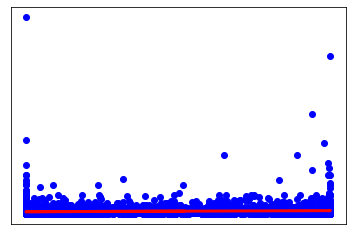

In [0]:
print('Coefficients: \n', regr3.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y3_test, y3_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y3_test, y3_pred))

# Plot outputs
plt.scatter(l3_test, y3_test,  color='blue')
plt.plot(l3_test, y3_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

**MULTIPLE LINEAR REGRESSION**

Now, let's apply some multiple linear regression to attributes.

We splitted the data like we did with all other models --> 80% Training, 20% test.

---



In [0]:
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()  
regressor.fit(X_train_mlr, y_train_mlr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
neighbourhood_group,11.702968
neighbourhood,0.084742
latitude,135.244597
longitude,-624.992675
room_type,-100.183316
minimum_nights,-0.011848
number_of_reviews,-0.264745
reviews_per_month,-3.245110
calculated_host_listings_count,-0.103544
availability_365,0.203577


Let's look at the training data test scores.

---



In [0]:
from sklearn import metrics

mlr_pred_tr = regressor.predict(X_train_mlr)

print('Mean Absolute Error of Multiple Linear Regression for training:', metrics.mean_absolute_error(y_train_mlr, mlr_pred_tr))
print('Mean Squared Error of Multiple Linear Regression for training:', metrics.mean_squared_error(y_train_mlr, mlr_pred_tr))
print('Root Mean Squared Error of Multiple Linear Regression for training:', np.sqrt(metrics.mean_squared_error(y_train_mlr, mlr_pred_tr)))
print('R-square score of Multiple Linear Regression for training: ', metrics.r2_score(y_train_mlr, mlr_pred_tr))

Mean Absolute Error of Multiple Linear Regression for training: 76.35559444572567
Mean Squared Error of Multiple Linear Regression for training: 55763.62456415147
Root Mean Squared Error of Multiple Linear Regression for training: 236.14322891870407
R-square score of Multiple Linear Regression for training:  0.08623444877227404


We created a list of values that are predicted by using this model.

---



In [0]:
mlr_pred = regressor.predict(X_test_mlr)

Below are the scores of our Multiple Linear Regression. We don't have an accuracy score because it is not applicable in Multiple Linear Regression.

---



In [0]:
from sklearn import metrics

print('Mean Absolute Error of Multiple Linear Regression:', metrics.mean_absolute_error(y_test_mlr, mlr_pred))
print('Mean Squared Error of Multiple Linear Regression:', metrics.mean_squared_error(y_test_mlr, mlr_pred))
print('Root Mean Squared Error of Multiple Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test_mlr, mlr_pred)))
print('R-square score of Multiple Linear Regression: ', metrics.r2_score(y_test_mlr, mlr_pred))

Mean Absolute Error of Multiple Linear Regression: 72.03595141087511
Mean Squared Error of Multiple Linear Regression: 39353.42054582541
Root Mean Squared Error of Multiple Linear Regression: 198.37696576423738
R-square score of Multiple Linear Regression:  0.11042070385700653


To see it more clearly and get a plot we should create a distinct dataframe.

---



In [0]:
df4 = pd.DataFrame({'Actual': y_test_mlr, 'Predicted': mlr_pred})
df5 = df4.head(10)
df5

,Actual,Predicted
879,89,207.709478
44383,30,95.536788
15394,120,116.136545
43230,470,240.017487
16332,199,183.888107
5966,170,149.192887
29838,90,95.313982
41764,60,164.379342
11118,150,210.167403
31800,74,108.324576


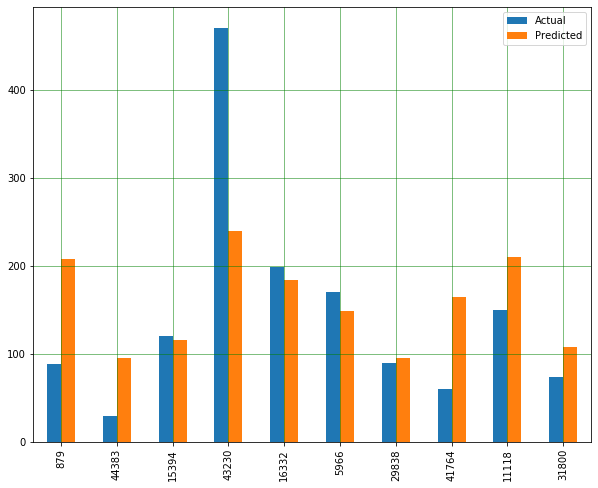

In [0]:
df5.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**RANDOM FOREST REGRESSOR**

We splitted the data like we did with all other models --> 80% Training, 20% test.

---



In [0]:
X_train_rfr, X_test_rfr, y_train_rfr, y_test_rfr = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

**Hyperparameter Tuning**

Like we performed in the Random Forest Classifier, Grid Search and Cross Validation method is going to be used.

---



In [0]:
def rfr_model(X, y):
    #Perform Grid-Search
    gsc = GridSearchCV(estimator=RandomForestRegressor(),
                        param_grid={'max_depth': range(3,7),
                                    'n_estimators': (10, 50, 100)},
                       cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=42, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

    return scores, rfr

In [0]:
scores, rfr = rfr_model(X_train_rfr, y_train_rfr)

In [0]:
scores

array([-68.41668524, -71.25385824, -68.66733862, -73.40794244,
       -70.23800682, -69.70436338, -71.70436301, -73.7485825 ,
       -75.522891  , -75.88722981])

Let's take a look at the training data test scores.

In [0]:
from sklearn import metrics

rfr_pred_tr = cross_val_predict(rfr, X_train_rfr, y_train_rfr, cv=10)

print('Mean Absolute Error of Random Forest Regressor for training:', metrics.mean_absolute_error(y_train_rfc, rfr_pred_tr))
print('Mean Squared Error of Random Forest Regressor for training:', metrics.mean_squared_error(y_train_rfc, rfr_pred_tr))
print('Root Mean Squared Error of Random Forest Regressor for training:', np.sqrt(metrics.mean_squared_error(y_train_rfc, rfr_pred_tr)))
print('R-square score of Random Forest Regressor for training: ', metrics.r2_score(y_train_rfc, rfr_pred_tr))

Mean Absolute Error of Random Forest Regressor for training: 140.42387974974264
Mean Squared Error of Random Forest Regressor for training: 26800.726380303935
Root Mean Squared Error of Random Forest Regressor for training: 163.70927395936963
R-square score of Random Forest Regressor for training:  -42.771544449293344


We created list of values that predicted by using this model.

---



In [0]:
rfr_pred = cross_val_predict(rfr, X_test_rfr, y_test_rfr, cv=10)

Below are the scores of our Random Forest Regressor. We don't have an accuracy score because it is not applicable in Random Forest Regressor.

---



In [0]:
from sklearn import metrics

print('Mean Absolute Error of Random Forest Regressor:', metrics.mean_absolute_error(y_test_rfr, rfr_pred))
print('Mean Squared Error of Random Forest Regressor:', metrics.mean_squared_error(y_test_rfr, rfr_pred))
print('Root Mean Squared Error of Random Forest Regressor:', np.sqrt(metrics.mean_squared_error(y_test_rfr, rfr_pred)))
print('R-square score of Random Forest Regressor: ', metrics.r2_score(y_test_rfr, rfr_pred))

Mean Absolute Error of Random Forest Regressor: 65.19781336243962
Mean Squared Error of Random Forest Regressor: 38877.81475500582
Root Mean Squared Error of Random Forest Regressor: 197.17457938336224
R-square score of Random Forest Regressor:  0.12117171504664759


To see it more clearly and get a plot we should create a distinct dataframe.

---



In [0]:
df6 = pd.DataFrame({'Actual': y_test_rfr, 'Predicted': rfr_pred})
df7 = df6.head(10)
df7

,Actual,Predicted
879,89,179.719347
44383,30,56.743114
15394,120,143.115689
43230,470,243.449721
16332,199,149.399234
5966,170,171.070950
29838,90,79.525024
41764,60,152.626802
11118,150,251.686575
31800,74,150.499238


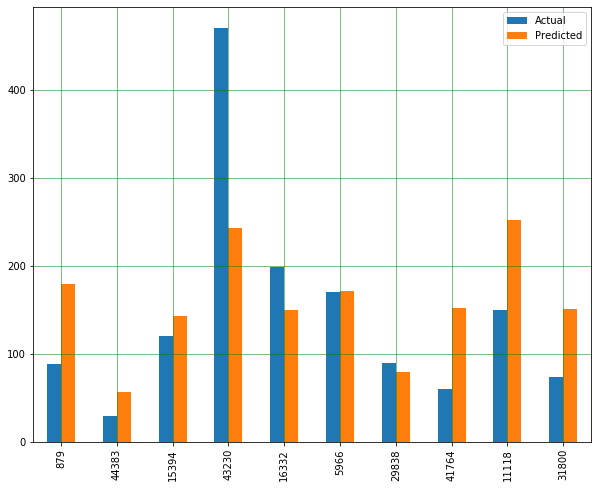

In [0]:
df7.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**MLP CLASSIFIER**

We splitted the data like we did with all other models --> 80% Training, 20% test.

---



In [0]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_zip, y_zip, test_size=0.2, random_state=42)

Let's fit the splitted data into our MLP Classifier model and get the predictions.

---



In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model_nn = MLPClassifier(hidden_layer_sizes=(500,500,500), max_iter=50, alpha=0.0001, solver='adam', verbose=10,  random_state=21, tol=0.000000001)#adam

model_nn.fit(X_train_nn, y_train_nn)

Iteration 1, loss = 2.50418958
Iteration 2, loss = 1.99682090
Iteration 3, loss = 1.84334340
Iteration 4, loss = 1.79955847
Iteration 5, loss = 1.77131410
Iteration 6, loss = 1.76142864
Iteration 7, loss = 1.75871390
Iteration 8, loss = 1.74562140
Iteration 9, loss = 1.74064921
Iteration 10, loss = 1.73767494
Iteration 11, loss = 1.73487623
Iteration 12, loss = 1.72768023
Iteration 13, loss = 1.72475019
Iteration 14, loss = 1.72071440
Iteration 15, loss = 1.71759745
Iteration 16, loss = 1.71318431
Iteration 17, loss = 1.70909216
Iteration 18, loss = 1.71192081
Iteration 19, loss = 1.70397207
Iteration 20, loss = 1.69828161
Iteration 21, loss = 1.69709734
Iteration 22, loss = 1.69126274
Iteration 23, loss = 1.68801855
Iteration 24, loss = 1.68271628
Iteration 25, loss = 1.67856135
Iteration 26, loss = 1.67263853
Iteration 27, loss = 1.66530347
Iteration 28, loss = 1.65320138
Iteration 29, loss = 1.64090032
Iteration 30, loss = 1.63300016
Iteration 31, loss = 1.62911409
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(500, 500, 500), learning_rate='constant',
              learning_rate_init=0.001, max_iter=50, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=21, shuffle=True, solver='adam', tol=1e-09,
              validation_fraction=0.1, verbose=10, warm_start=False)

Let's check the training data predictions scores.

---



In [0]:
from sklearn import metrics

nn_pred_tr = model_nn.predict(X_train_nn)

print('Mean Absolute Error of MLP Classifier for training:', metrics.mean_absolute_error(y_train_nn, nn_pred_tr))
print('Mean Squared Error of MLP Classifier for training:', metrics.mean_squared_error(y_train_nn, nn_pred_tr))
print('Root Mean Squared Error of MLP Classifier for training:', np.sqrt(metrics.mean_squared_error(y_train_nn, nn_pred_tr)))
print("R-square score of MLP Classifier for training: ", metrics.r2_score(y_train_nn, nn_pred_tr))
print("Accuracy of MLP Classifier for training: ", accuracy_score(y_train_nn, nn_pred_tr))

Mean Absolute Error of MLP Classifier for training: 6.09111361079865
Mean Squared Error of MLP Classifier for training: 529.8427242049289
Root Mean Squared Error of MLP Classifier for training: 23.018312801005397
R-square score of MLP Classifier for training:  0.1346490380680605
Accuracy of MLP Classifier for training:  0.4506340116576337


Let's get the predictions of test data.

---



In [0]:
nn_pred = model_nn.predict(X_test_nn)

Below are the scores of the MLP Classifier.

---



In [0]:
from sklearn import metrics

print('Mean Absolute Error of MLP Classifier:', metrics.mean_absolute_error(y_test_nn, nn_pred))
print('Mean Squared Error of MLP Classifier:', metrics.mean_squared_error(y_test_nn, nn_pred))
print('Root Mean Squared Error of MLP Classifier:', np.sqrt(metrics.mean_squared_error(y_test_nn, nn_pred)))
print("R-square score of MLP Classifier: ", metrics.r2_score(y_test_nn, nn_pred))
print("Accuracy of MLP Classifier: ", accuracy_score(y_test_nn, nn_pred))

Mean Absolute Error of MLP Classifier: 6.094692708865937
Mean Squared Error of MLP Classifier: 489.03159832293693
Root Mean Squared Error of MLP Classifier: 22.114058838732817
R-square score of MLP Classifier:  -0.10199688663785667
Accuracy of MLP Classifier:  0.41711831475611005


In [0]:
df8 = pd.DataFrame({'Actual': y_test_nn, 'Predicted': nn_pred})
df9 = df8.head(10)
df9

,Actual,Predicted
879,8,12
44383,0,4
15394,12,4
43230,44,20
16332,20,12
5966,16,12
29838,8,4
41764,4,16
11118,12,20
31800,4,8


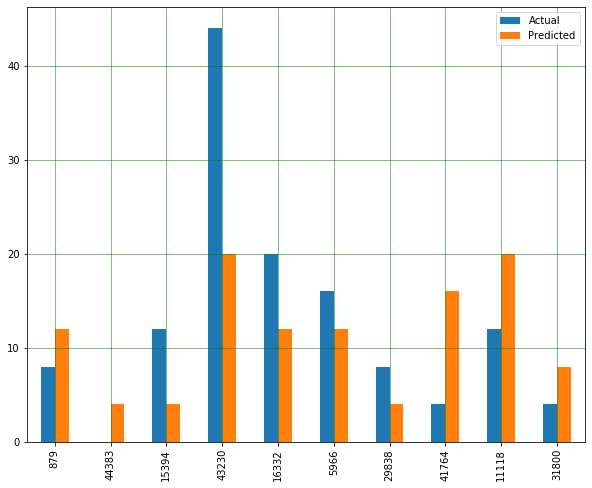

In [0]:
df9.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

**LOGISTIC REGRESSION**

We splitted the data like we did with all other models --> 80% Training, 20% test.

---



In [0]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_zip, y_zip, test_size=0.2, random_state=42)

Let's fit our split data to our Logistic Regression model and get the predictions.

---



In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_log = LogisticRegression()

In [0]:
model_log.fit(X_train_log, y_train_log)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Let's check the scores for training data predictions.

---



In [0]:
from sklearn import metrics

log_pred_tr = model_log.predict(X_train_log)

print('Mean Absolute Error of Logistic Regression for training:', metrics.mean_absolute_error(y_train_log, log_pred_tr))
print('Mean Squared Error of Logistic Regression for training::', metrics.mean_squared_error(y_train_log, log_pred_tr))
print('Root Mean Squared Error of Logistic Regression for training::', np.sqrt(metrics.mean_squared_error(y_train_log, log_pred_tr)))
print("R-square score of Logistic Regression for training:: ", metrics.r2_score(y_train_log, log_pred_tr))
print("Accuracy of Logistic Regression for training:: ", accuracy_score(y_train_log, log_pred_tr))

Mean Absolute Error of Logistic Regression for training: 7.035381940893752
Mean Squared Error of Logistic Regression for training:: 611.6539523468657
Root Mean Squared Error of Logistic Regression for training:: 24.731638691094968
R-square score of Logistic Regression for training::  0.0010331144452674357
Accuracy of Logistic Regression for training::  0.37818284078126596


Now, let's get the predictions for the test set.

---



In [0]:
log_pred = model_log.predict(X_test_log)

Below are the scores of Logistic Regression.

---



In [0]:
from sklearn import metrics

print('Mean Absolute Error of Logistic Regression:', metrics.mean_absolute_error(y_test_log, log_pred))
print('Mean Squared Error of Logistic Regression:', metrics.mean_squared_error(y_test_log, log_pred))
print('Root Mean Squared Error of Logistic Regression:', np.sqrt(metrics.mean_squared_error(y_test_log, log_pred)))
print("R-square score of Logistic Regression: ", metrics.r2_score(y_test_log, log_pred))
print("Accuracy of Logistic Regression: ", accuracy_score(y_test_log, log_pred))

Mean Absolute Error of Logistic Regression: 6.579404847121382
Mean Squared Error of Logistic Regression: 437.6120257695061
Root Mean Squared Error of Logistic Regression: 20.91917842004093
R-square score of Logistic Regression:  0.013873353772889563
Accuracy of Logistic Regression:  0.3816341139175785


In [0]:
df10 = pd.DataFrame({'Actual': y_test_log, 'Predicted': log_pred})
df11 = df10.head(10)
df11

,Actual,Predicted
879,8,12
44383,0,4
15394,12,4
43230,44,20
16332,20,12
5966,16,12
29838,8,4
41764,4,12
11118,12,12
31800,4,12


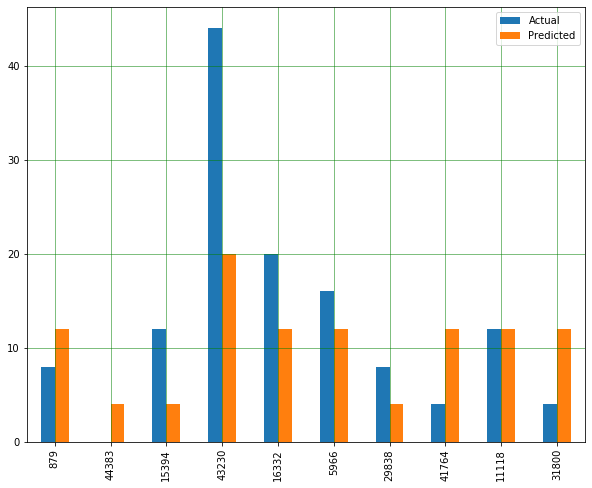

In [0]:
df11.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Summary

**RESULTS**

We mentioned the results in Methods part which is in the beginning of Machine Learning section of our notebook. But to see it clearly, we should sum it up:

Random Forest Classifier --> Grid Search, Cross Validation, Dataframe with price ranges

Multiple Linear Regression --> Dataframe with exact prices

Random Forest Regressor --> Grid Search, Cross Validation, Dataframe with exact prices

MLP Classifier --> Dataframe with price ranges

Logistic Regression --> Dataframe with price ranges


| **ML Methods**  | **Extra Algorithms?** | **R-square** | **Accuracies** | **MSE** |
| ---             |   ---                 |  ---         | ---        | --- |
| `Random Forest Classifier with Exact Price` | No | -0.27211463850698037 | 0.07 | 56276.11 |
| `Multiple Linear Regression` | No | 0.110 | - | 39353.42 | 
| `Random Forest Regressor` | Grid Search, Cross-Val | 0.109 | - | 38877.81 |
| `Random Forest Classifier with Price Range` | Grid Search, Cross-Val | 0.176 | 0.454 | 365.25 |
| `MLP Classifier` | No | 0.019 | 0.417 | 489.03 |
| `Logistic Regression` | Grid Search, Cross-Val | 0.013 | 0.381 | 437.61 |

Looking at the above table we can clearly see the answer of our first sub-question: “What machine learning method we should use to get the best possible results?”. **Random Forest Classifier** gives the best accuracy with tuned parameters when the price range dataframe is used.

Answers to our hypothesis questions are all the same, every feature selected for hypothesis testing (neighbourhood group, longitude, latitude) is **important** in the determination of price.

But the answer to our main question “What is the price range of a given Airbnb rental depending on its features?” that it can be answered using Random Forest Classifier with the price ranges but it can also be improved to get closer to the reality.

More details and every observation in our project are explained step-by-step in the related part of our project.

---




**DISCUSSION**

| **ML Methods** | **Acc train** | **Acc test** | **MSE train** | **MSE test** |
| --- | --- | --- | --- | --- |
|`Random Forest Classsifier`| 0.466 | 0.454 | 572.75 | 365.25 |
|`Multiple Linear Regression`| - | - | 55763.62 | 39353.42 |
|`Random Forest Regressor`| - | - | 26800.72 | 38877.81 |
|`MLP Classifier`| 0.450 | 0.363 | 529.84 | 489.03 |
|`Logistic Regression`| 0.378 | 0.381 | 611.65 | 437.61 |

We do not have any kind of overfitting in our methods. At first, we had it in the Random Forest Classifier, we were getting 99% accuracy in training and 45% accuracy in testing. After some parameter tuning that was solved.

As a result, we determined the Random Forest Classifier which tuned in terms of parameters and where the dataframe with the price ranges are used as the method to be used in this project.

---




**CONCLUSION**

--> We concluded that we can get a price range given the features using ML methods.

--> As the accuracy showed the best method to use is Random Forest Classifier predicting a price range with parameter tuning.

--> Every feature selected for hypothesis testing (neighbourhood group, longitude, latitude) is important in the determination of price.

---




**Division of Work**

Kaya Kapağan, Batur Gültekin --> Data Cleaning and Exploratory Data Analysis

Yiğit Tekinalp --> Hypothesis Testing

Ceren Anıl and Habibe Koç --> Machine Learning

---

